# 1. Importing the necessary dependencies.

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Counting
from collections import Counter

# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Train Test Split
from sklearn.model_selection import train_test_split

#All 6 Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier

# Accuracy, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Now, let’s read the data into a DataFrame.

In [2]:
df = pd.read_csv('news.csv')

# 3. Now we will get the shape of the data and the first 5 records.

In [3]:
df.shape

(6335, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## 4. Checking for Null Values.

In [5]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## 5. And get the labels from the DataFrame.

In [8]:
Counter(df['label']) 

Counter({'FAKE': 3164, 'REAL': 3171})

# 6. Showing a graph of total number of Fake & Real News.

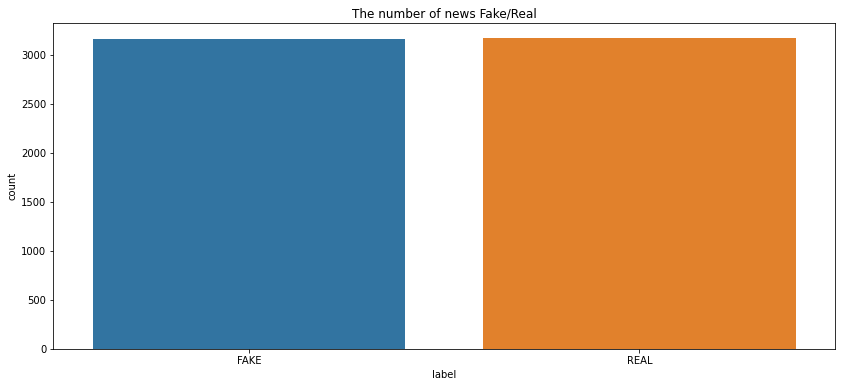

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(df['label'])
plt.title('The number of news Fake/Real')
plt.show()

# 7. Split the dataset into training and testing sets.

In [10]:
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['label'],test_size=0.2,random_state=7)
len(X_train), len(X_test)

(5068, 1267)

In [11]:
0.8*6335    #80% (0.8x6335)=5068 splited in Train

5068.0

In [12]:
0.2*6335   #20% (0.2x6335) splited in Test

1267.0

In [13]:
5068+1267              

6335

# 8. Tranforming a given data into vector based on frequency of each.

In [14]:
v = CountVectorizer()                           
X_train_count = v.fit_transform(X_train)
X_train_count.toarray()[:5]

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [15]:
X_test_count = v.transform(X_test)
X_test_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# 9. (Model1 -MultinomialNB ) - Creating and Training MultinomialNB Model, checking accuracy, predicting, confusion_matrix and classification report.

In [16]:
model1 = MultinomialNB()
model1.fit(X_train_count,y_train)

MultinomialNB()

In [17]:
s1 = model1.score(X_train_count,y_train)
s1

0.9293606945540647

In [18]:
y_pred1 = model1.predict(X_test_count)
y_pred1[:10]

array(['REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL',
       'REAL', 'FAKE'], dtype='<U4')

In [19]:
y_test[:10]

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
3031    REAL
4854    REAL
5861    REAL
307     REAL
2956    FAKE
Name: label, dtype: object

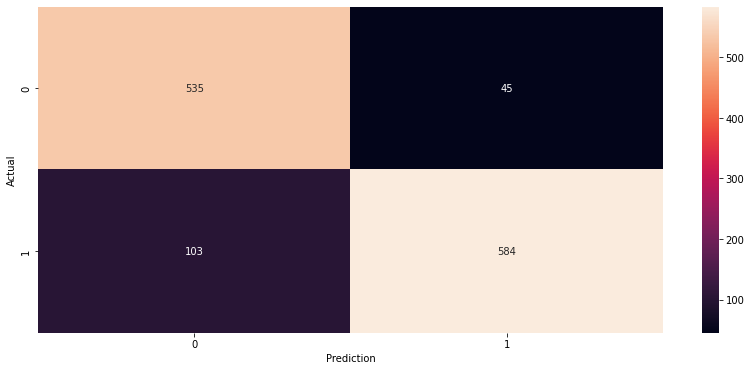

In [20]:
cm = confusion_matrix(y_pred1,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')  
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [21]:
print(classification_report(y_pred1,y_test))      

              precision    recall  f1-score   support

        FAKE       0.84      0.92      0.88       580
        REAL       0.93      0.85      0.89       687

    accuracy                           0.88      1267
   macro avg       0.88      0.89      0.88      1267
weighted avg       0.89      0.88      0.88      1267



# 10. (Model2-SVC) - Creating and Training SVC Model, checking accuracy, predicting, confusion_matrix and classification report.

In [22]:
model2 = SVC()
model2.fit(X_train_count,y_train)

SVC()

In [23]:
s2 = model2.score(X_train_count,y_train)
s2

0.877663772691397

In [24]:
y_pred2 = model2.predict(X_test_count)
y_pred2[:10]

array(['FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE',
       'REAL', 'FAKE'], dtype=object)

In [25]:
y_test[:10]

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
3031    REAL
4854    REAL
5861    REAL
307     REAL
2956    FAKE
Name: label, dtype: object

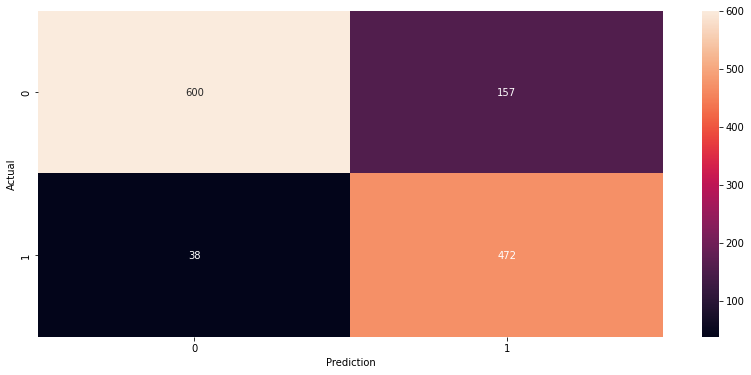

In [26]:
cm = confusion_matrix(y_pred2,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [27]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

        FAKE       0.94      0.79      0.86       757
        REAL       0.75      0.93      0.83       510

    accuracy                           0.85      1267
   macro avg       0.85      0.86      0.84      1267
weighted avg       0.86      0.85      0.85      1267



# 11. (Model3-LogisticRegression)- Creating and Training LogisticRegression Model, checking accuracy, predicting, confusion_matrix and classification report.

In [28]:
model3 = LogisticRegression()
model3.fit(X_train_count,y_train)

LogisticRegression()

In [29]:
s3 = model3.score(X_train_count,y_train)
s3

0.9992107340173638

In [30]:
y_pred3 = model3.predict(X_test_count)
y_pred3[:10]

array(['REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL',
       'REAL', 'FAKE'], dtype=object)

In [31]:
y_test[:10]

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
3031    REAL
4854    REAL
5861    REAL
307     REAL
2956    FAKE
Name: label, dtype: object

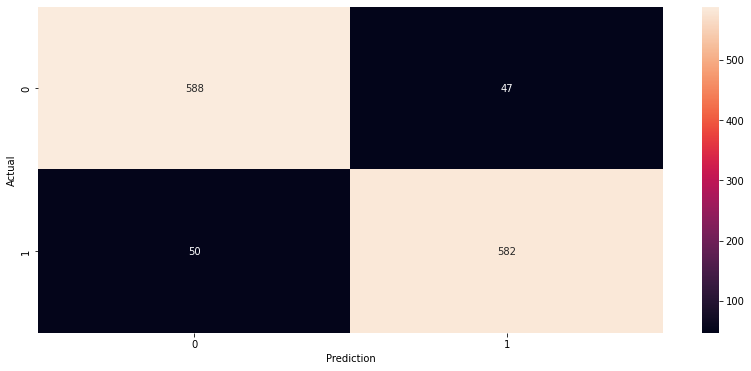

In [32]:
cm = confusion_matrix(y_pred3,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [33]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.92       635
        REAL       0.93      0.92      0.92       632

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



# 12. (Model4-RandomForestClassifier) - Creating and Training RandomForestClassifier Model, checking accuracy, predicting, confusion_matrix and classification report.

In [34]:
model4 = RandomForestClassifier(n_estimators=45)
model4.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=45)

In [35]:
s4 = model4.score(X_train_count,y_train)
s4

1.0

In [36]:
y_pred4 = model4.predict(X_test_count)
y_pred4[:10]

array(['REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL',
       'REAL', 'FAKE'], dtype=object)

In [37]:
y_test[:10]

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
3031    REAL
4854    REAL
5861    REAL
307     REAL
2956    FAKE
Name: label, dtype: object

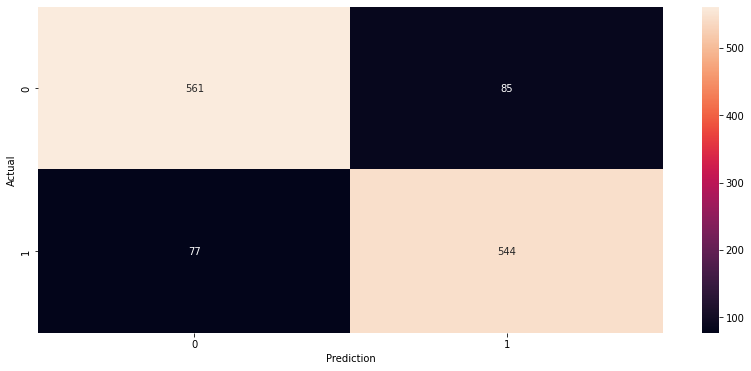

In [38]:
cm = confusion_matrix(y_pred4,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [39]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

        FAKE       0.88      0.87      0.87       646
        REAL       0.86      0.88      0.87       621

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267



# 13. (Model5-PassiveAggressiveClassifier) - Creating and Training PassiveAggressiveClassifier Model, checking accuracy, predicting, confusion_matrix and classification report.

In [40]:
model5 = PassiveAggressiveClassifier(max_iter=50)
model5.fit(X_train_count,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [41]:
s5 = model5.score(X_train_count,y_train)
s5

0.9984214680347278

In [42]:
y_pred5=model5.predict(X_test_count)
y_pred5[:10]

array(['REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL',
       'REAL', 'FAKE'], dtype='<U4')

In [43]:
y_test[:10]

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
3031    REAL
4854    REAL
5861    REAL
307     REAL
2956    FAKE
Name: label, dtype: object

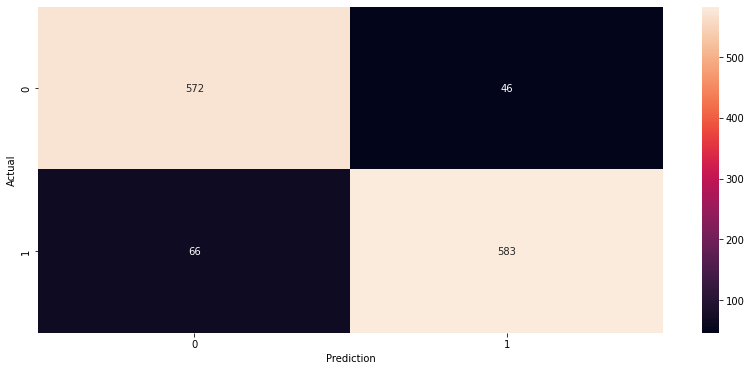

In [44]:
cm = confusion_matrix(y_pred5,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [45]:
print(classification_report(y_pred5,y_test))

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.91       618
        REAL       0.93      0.90      0.91       649

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



# 14. (Model6-DecisionTreeClassifier) - Creating and Training DecisionTreeClassifier Model, checking accuracy, predicting, confusion_matrix and classification report.

In [46]:
model6 = DecisionTreeClassifier()
model6.fit(X_train_count,y_train)

DecisionTreeClassifier()

In [47]:
s6 = model6.score(X_train_count,y_train)
s6

1.0

In [48]:
y_pred6 = model6.predict(X_test_count)
y_pred6[:10]

array(['REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL',
       'REAL', 'FAKE'], dtype=object)

In [49]:
y_test[:10]

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
3031    REAL
4854    REAL
5861    REAL
307     REAL
2956    FAKE
Name: label, dtype: object

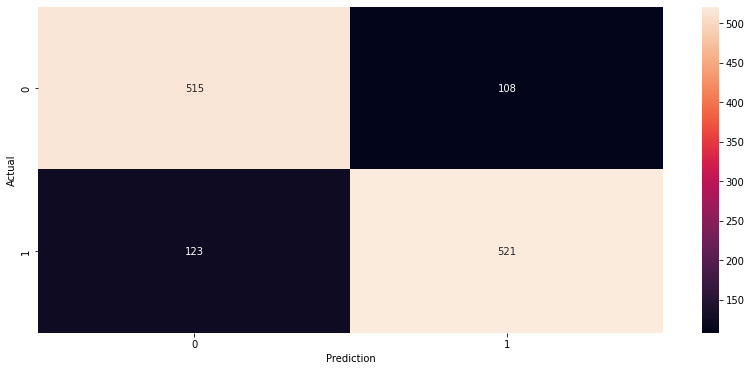

In [50]:
cm = confusion_matrix(y_pred6,y_test)
plt.figure(figsize=(14,6))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [51]:
print(classification_report(y_pred6,y_test))

              precision    recall  f1-score   support

        FAKE       0.81      0.83      0.82       623
        REAL       0.83      0.81      0.82       644

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



# 15. Comparing Accuracy of All ML Models.

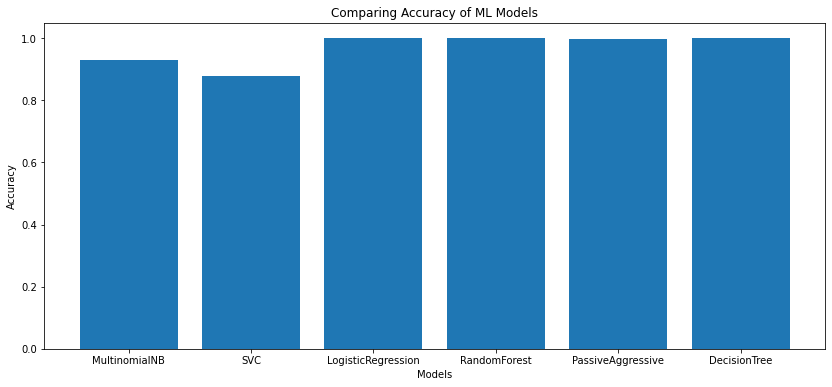

In [52]:
plt.figure(figsize=(14,6))
x=['MultinomialNB','SVC','LogisticRegression', 'RandomForest', 'PassiveAggressive', 'DecisionTree']
y=[s1,s2,s3,s4,s5,s6]
plt.title('Comparing Accuracy of ML Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.bar(x,y)
plt.show()

# Result : It is noted that this 4 Algorithm Logistic Regression, RandomForest Classifier, Passive Aggresive Classifier, Decision Tree Classifier having more accuracy then compare to MultinomialMB and SVC.